In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
df = pd.read_csv("SpotifyFeatures.csv")

In [434]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [435]:
df = df.drop(columns = ["artist_name", "track_name", "track_id"])
# gereksiz sütünlar temizlendi

In [436]:
df['mode'] = df['mode'].map({'Major':1, 'Minor':0})
# pandas kütüphanesinden map() fonksiyonu ile mode sütunu binary yapıldı.

In [437]:
df['key'] = df['key'].astype('category').cat.codes
# .cat.codes ile bu kategorik değerlerin her birine 0,1,2,... gibi sayısal kodlar atandı.

In [438]:
df['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

In [439]:
df = df[df['time_signature'] != 0]  # 0 olanları çıkardık


In [440]:
# 'time_signature' sütununu sadece sayıya çevir (örn: '4/4' -> 4)
df['time_signature'] = df['time_signature'].apply(lambda x: int(str(x).split('/')[0]))

In [441]:
from sklearn.preprocessing import LabelEncoder

In [442]:
le = LabelEncoder() # encoder nesnesi oluşturuyoruz
df['genre_encoded'] = le.fit_transform(df['genre'])
# genre sütununu sayısal hedefe dönüştürdük

In [443]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_encoded
0,Movie,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,1,0.0525,166.969,4,0.814,15
1,Movie,1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,0,0.0868,174.003,4,0.816,15
2,Movie,3,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,0,0.0362,99.488,5,0.368,15
3,Movie,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,1,0.0395,171.758,4,0.227,15
4,Movie,4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,1,0.0456,140.576,4,0.390,15


In [444]:
df.isnull().sum()

genre               0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
genre_encoded       0
dtype: int64

In [445]:
df.dtypes

genre                object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                    int8
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
genre_encoded         int64
dtype: object

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   popularity        232725 non-null  int64  
 2   acousticness      232725 non-null  float64
 3   danceability      232725 non-null  float64
 4   duration_ms       232725 non-null  int64  
 5   energy            232725 non-null  float64
 6   instrumentalness  232725 non-null  float64
 7   key               232725 non-null  int8   
 8   liveness          232725 non-null  float64
 9   loudness          232725 non-null  float64
 10  mode              232725 non-null  int64  
 11  speechiness       232725 non-null  float64
 12  tempo             232725 non-null  float64
 13  time_signature    232725 non-null  int64  
 14  valence           232725 non-null  float64
 15  genre_encoded     232725 non-null  int64  
dtypes: float64(9), int64

In [447]:
df.describe()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_encoded
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,5.344467,0.215009,-9.569885,0.652031,0.120765,117.666585,3.885148,0.454917,13.623324
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,3.461641,0.198273,5.998204,0.476327,0.185518,30.898907,0.462955,0.260065,7.491245
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.000000,0.009670,-52.457000,0.000000,0.022200,30.379000,0.000000,0.000000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,3.000000,0.097400,-11.771000,0.000000,0.036700,92.959000,4.000000,0.237000,7.000000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,5.000000,0.128000,-7.762000,1.000000,0.050100,115.778000,4.000000,0.444000,14.000000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,8.000000,0.264000,-5.501000,1.000000,0.105000,139.054000,4.000000,0.660000,20.000000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,11.000000,1.000000,3.744000,1.000000,0.967000,242.903000,5.000000,1.000000,26.000000


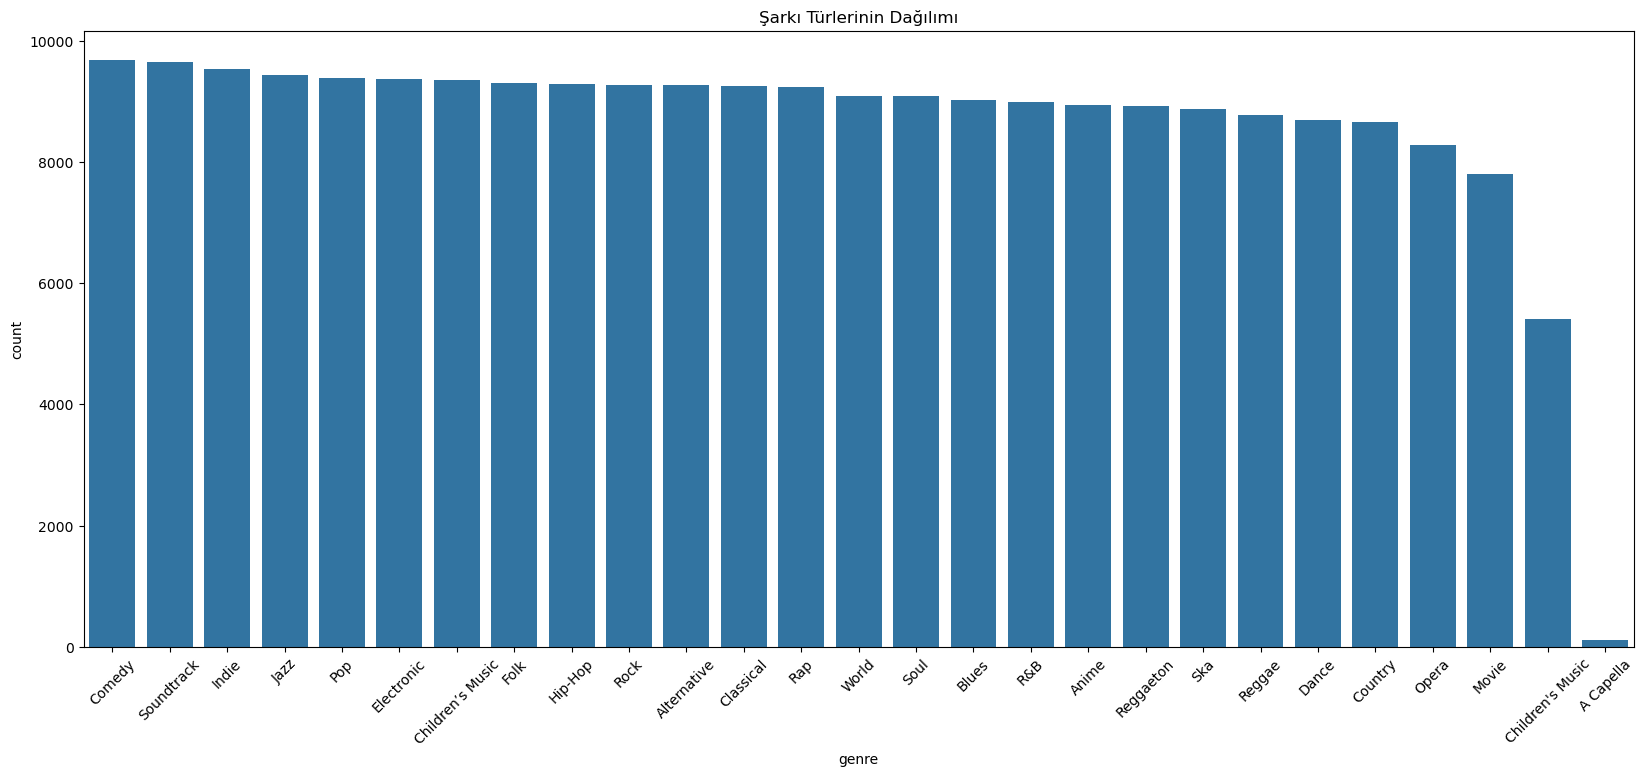

In [448]:
plt.figure(figsize=(20,8))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Şarkı Türlerinin Dağılımı")
plt.show()

In [449]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [450]:
df['genre'] = df['genre'].replace("Children’s Music", "Children's Music")
# farklı şekilde yazılmış aynı türü birleştirdik

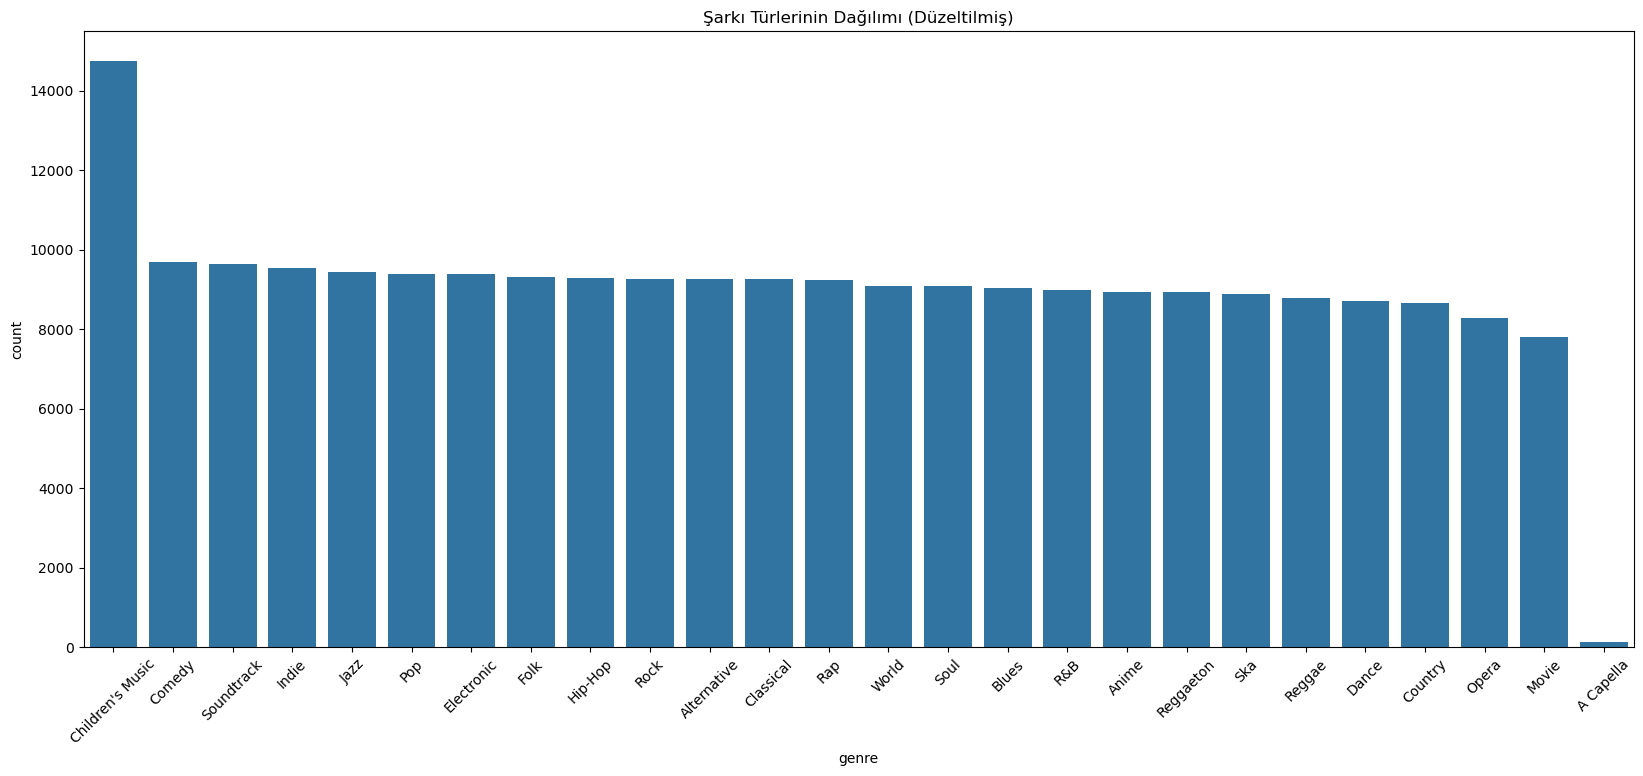

In [451]:
plt.figure(figsize=(20,8))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Şarkı Türlerinin Dağılımı (Düzeltilmiş)")
plt.show()

In [452]:
unique_genres = sorted(df['genre'].unique())
print(unique_genres)
# Tüm kategorileri alfabetik sırayla listeledik ( gözden kaçan aynı tür var mı diye bakmak için)

['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music", 'Classical', 'Comedy', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul', 'Soundtrack', 'World']


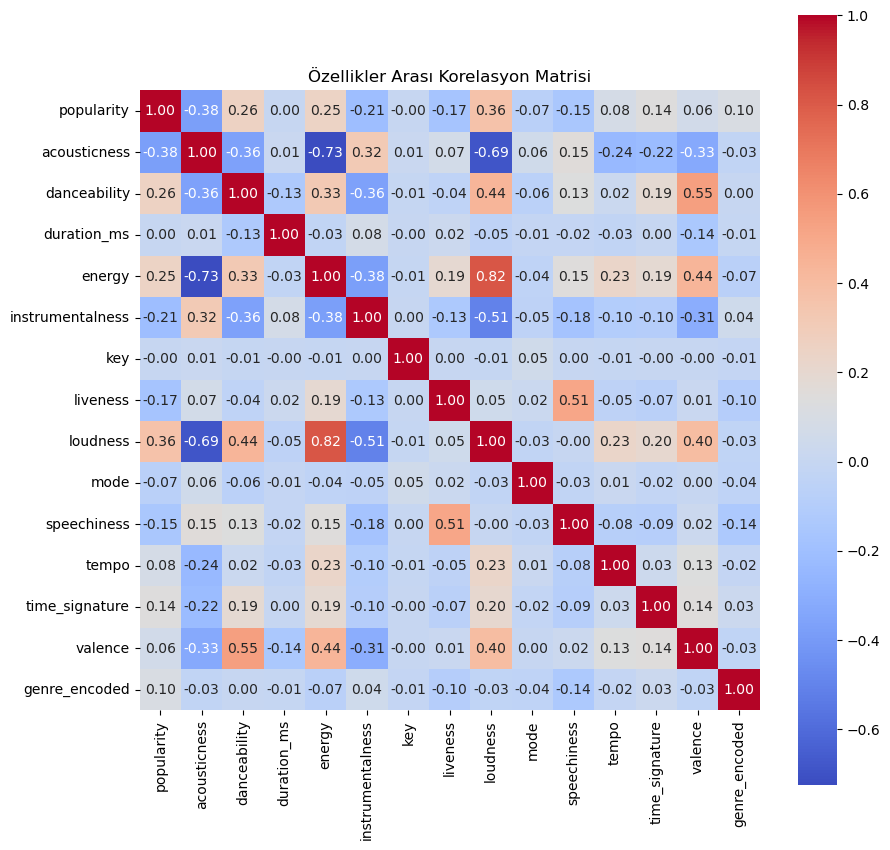

In [453]:
# Özellikler arasındaki korelasyon matrisi ve ısı haritası
plt.figure(figsize=(10,10))
corr = df.corr(numeric_only=True)  # pandas 1.5+ sürümlerde numeric_only parametresi var
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Özellikler Arası Korelasyon Matrisi")
plt.show()




Energy ve Loudness (0.82):
Çok güçlü pozitif korelasyon. Yani enerji arttıkça loudness (ses yüksekliği) da artıyor.
Mantıklı çünkü yüksek enerjili parçalar genelde daha yüksek sesle çalar.

Energy ve Acousticness (-0.73):
Güçlü negatif korelasyon. Acousticness, parçanın ne kadar akustik olduğunu gösterir (yani elektronik değil, doğal enstrümanlı).
Enerji arttıkça akustiklik düşüyor, yani enerjik parçalar genelde elektronik veya daha hareketli,
doğal olmayan seslere sahip.

Acousticness ve Loudness (-0.69):
Orta-yüksek negatif korelasyon. Yüksek akustiklik genelde daha düşük ses yüksekliğiyle (loudness) geliyor. 
Akustik parçalar genelde daha sakin, doğal, yumuşak.

Valence ve Mode (0):
Hiç korelasyon yok. Valence, parçanın ne kadar pozitif, neşeli olduğunu ölçer.
Mode ise majör (1) veya minör (0) olması. Beklendiği gibi; bir parçanın majör ya da minör olması doğrudan mutluluk seviyesiyle bağdaşmıyor.
Bu da müzikte karmaşıklığı gösterir, çünkü mutluluk sadece modla belirlenmez.

In [456]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_encoded
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,5.344467,0.215009,-9.569885,0.652031,0.120765,117.666585,3.885148,0.454917,13.623324
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,3.461641,0.198273,5.998204,0.476327,0.185518,30.898907,0.462955,0.260065,7.491245
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.000000,0.009670,-52.457000,0.000000,0.022200,30.379000,0.000000,0.000000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,3.000000,0.097400,-11.771000,0.000000,0.036700,92.959000,4.000000,0.237000,7.000000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,5.000000,0.128000,-7.762000,1.000000,0.050100,115.778000,4.000000,0.444000,14.000000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,8.000000,0.264000,-5.501000,1.000000,0.105000,139.054000,4.000000,0.660000,20.000000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,11.000000,1.000000,3.744000,1.000000,0.967000,242.903000,5.000000,1.000000,26.000000


# Normalizasyon


In [458]:
from sklearn.preprocessing import MinMaxScaler

# Normalleştirme için scaler nesnesi oluşturuluyor
scaler = MinMaxScaler()

# Sürekli (numerik) özellikler listesi
continuous_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                       'energy', 'instrumentalness', 'liveness', 'loudness', 
                       'speechiness', 'tempo', 'valence']

# Normalizasyon uygulanıyor ve sonuçlar df'ye yazılıyor
df[continuous_features] = scaler.fit_transform(df[continuous_features])


In [459]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_encoded
count,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,0.411275,0.370041,0.533703,0.039681,0.571520,0.148450,5.344467,0.207344,0.763102,0.652031,0.104324,0.410719,3.885148,0.454917,13.623324
std,0.181899,0.356193,0.199129,0.021478,0.263725,0.303071,3.461641,0.200209,0.106728,0.476327,0.196357,0.145390,0.462955,0.260065,7.491245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290000,0.037751,0.405643,0.030243,0.385373,0.000000,3.000000,0.088587,0.723937,0.000000,0.015347,0.294461,4.000000,0.237000,7.000000
50%,0.430000,0.232932,0.551550,0.037027,0.605598,0.000044,5.000000,0.119485,0.795271,1.000000,0.029530,0.401832,4.000000,0.444000,14.000000
75%,0.550000,0.724900,0.681365,0.045215,0.787783,0.035836,8.000000,0.256813,0.835501,1.000000,0.087638,0.511354,4.000000,0.660000,20.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,26.000000


In [487]:
df.to_csv("SpotifyFeaturesCleaned.csv", index=False)